<a href="https://colab.research.google.com/github/xchen35/Model_Imagenet32/blob/master/Alexnet_On_Imagenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
from keras import optimizers
from skimage.transform import resize
import os

In [0]:
batch_size = 32
num_classes = 1000
epochs = 20
data_augmentation = True
size = 224
num_predictions = 20

In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls "/content/drive/My Drive"

'Colab Notebooks'   out_data_train.zip	 x_val_1.npy
 foo.txt	   'Sample upload.txt'	 y_train_1.npy
 out_data_train     x_train_1.npy	 y_val_1.npy


In [0]:
import pickle
def unpickle(file):
    """load the cifar-10 data"""

    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

In [0]:
def load_data(data_dir, negatives=False):
    """
    Return train_data, train_labels, test_data, test_labels
    """

    # training data
    train_data = None
    train_labels = []

    # train_data_dict

    for i in range(1, 11):
        train_data_dict = unpickle(data_dir + "/train_data_batch_{}".format(i))
        if i == 1:
            train_data = train_data_dict['data']
        else:
            train_data = np.vstack((train_data, train_data_dict['data']))
#         train_filenames += train_data_dict[b'filenames']
        train_labels += train_data_dict['labels']

    train_data = train_data.reshape((len(train_data), 3, 32, 32))
    print(len(train_data))
    if negatives:
        train_data = cifar_train_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        train_data = np.rollaxis(train_data, 1, 4)
#     train_filenames = np.array(train_filenames)
    train_labels = np.array(train_labels)

    # test data
    # cifar_test_data_dict
    # 'batch_label': 'testing batch 1 of 1'
    # 'data': ndarray
    # 'labels': list

    test_data_dict = unpickle(data_dir + "/val_data")
    test_data = test_data_dict['data']
    test_labels = test_data_dict['labels']

    test_data = test_data.reshape((len(test_data), 3, 32, 32))
    if negatives:
        test_data = test_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        test_data = np.rollaxis(test_data, 1, 4)
    test_labels = np.array(test_labels)

    return train_data, train_labels, \
           test_data, test_labels

In [8]:
# The data, split between train and test sets:
x_train, y_train, x_test, y_test = \
        load_data('/content/drive/My Drive/out_data_train')
# print('x_train shape:', x_train.shape)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

100000
x_train shape: (100000, 32, 32, 3)
y_train shape: (100000,)
x_test shape: (2009, 32, 32, 3)
y_test shape: (2009,)


In [0]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [10]:
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (100000, 1)
y_test shape: (2009, 1)


In [0]:
# function change data shape from 32,32,3 to 224,224,3
# def resize_image_arr(img_arr):
#     x_resized_list = []
#     for i in range(img_arr.shape[0]):
#         img = img_arr[0]
#         resized_img = resize(img,(size,size))
#         x_resized_list.append(resized_img)
#     return np.stack(x_resized_list)

In [12]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (100000, 32, 32, 3)
y_train shape: (100000, 1)
100000 train samples
2009 test samples


In [0]:
# x_train = x_train[0:4000]
# y_train = y_train[0:4000]
# x_test = x_test[0:400]
# y_test = y_test[0:400]
# print('x_train shape:', x_train.shape)

In [0]:
# change data shape from 32,32,3 to 224,224,3
# x_train = resize_image_arr(x_train,)
# x_test = resize_image_arr(x_test)
# print('x_train shape:', x_train.shape)

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()

# The first convolutional layer filters the 224 × 224 × 3 input image with 96 kernels of size 11 × 11 × 3 with a stride of 4 pixels

# model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(Activation('relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))


# The second convolutional layer takes as input the (response-normalized and pooled) output of the first convolutional layer and filters it with 256 kernels of size 5 × 5 × 48

model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))


# The third convolutional layer has 384 kernels of size 3 × 3 × 256 connected to the (normalized, pooled) outputs of the second convolutional layer.

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


# The fourth convolutional layer has 384 kernels of size 3 × 3 × 192

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


# The fifth convolutional layer has 256 kernels of size 3 × 3 × 192

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))


# The fully-connected layers have 4096 neurons each
model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))


# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(num_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))

In [29]:
from keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
activation_14 (Activation)   (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 256)         614656    
_________________________________________________________________
activation_15 (Activation)   (None, 4, 4, 256)         0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 2, 2, 384)         885120    
__________

In [31]:
history = model.fit(x_train, y_train,
                    
          batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))

Train on 100000 samples, validate on 2009 samples
Epoch 1/20
 - 108s - loss: 5.5941 - acc: 0.0127 - val_loss: 6.0544 - val_acc: 0.0055
Epoch 2/20
 - 108s - loss: 5.2073 - acc: 0.0224 - val_loss: 6.3780 - val_acc: 0.0040
Epoch 3/20
 - 108s - loss: 4.9771 - acc: 0.0332 - val_loss: 6.3292 - val_acc: 0.0080
Epoch 4/20
 - 109s - loss: 4.7952 - acc: 0.0448 - val_loss: 6.4511 - val_acc: 0.0025
Epoch 5/20
 - 108s - loss: 4.6407 - acc: 0.0553 - val_loss: 6.7555 - val_acc: 0.0070
Epoch 6/20
 - 108s - loss: 4.5150 - acc: 0.0680 - val_loss: 6.6037 - val_acc: 0.0040
Epoch 7/20
 - 108s - loss: 4.4015 - acc: 0.0792 - val_loss: 7.0380 - val_acc: 0.0060
Epoch 8/20
 - 109s - loss: 4.3024 - acc: 0.0891 - val_loss: 6.7610 - val_acc: 0.0055
Epoch 9/20
 - 108s - loss: 4.2237 - acc: 0.0989 - val_loss: 6.9613 - val_acc: 0.0060
Epoch 10/20
 - 109s - loss: 4.1404 - acc: 0.1100 - val_loss: 7.3334 - val_acc: 0.0065
Epoch 11/20
 - 108s - loss: 4.0668 - acc: 0.1186 - val_loss: 6.9097 - val_acc: 0.0025
Epoch 12/20
 

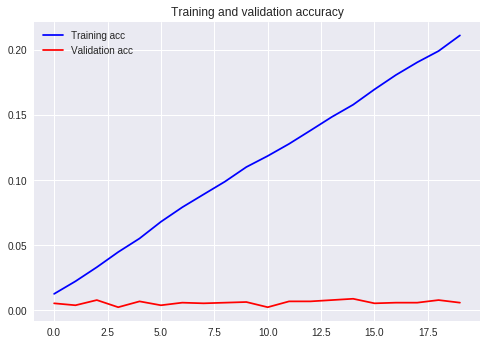

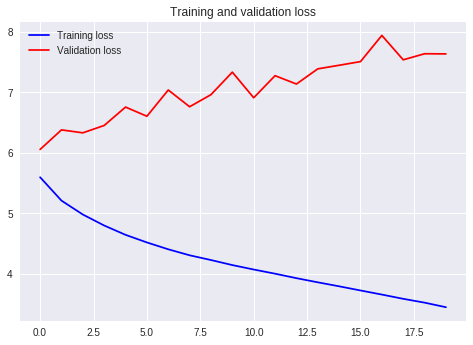

In [33]:
import matplotlib.pyplot as plt
# visualization
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epoch = range(len(acc))
 
plt.plot(epoch, acc, 'b', label='Training acc')
plt.plot(epoch, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epoch, loss, 'b', label='Training loss')
plt.plot(epoch, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()